Atividades selecionadas (recursivo): [(1, 2), (3, 4), (5, 7), (8, 9)]


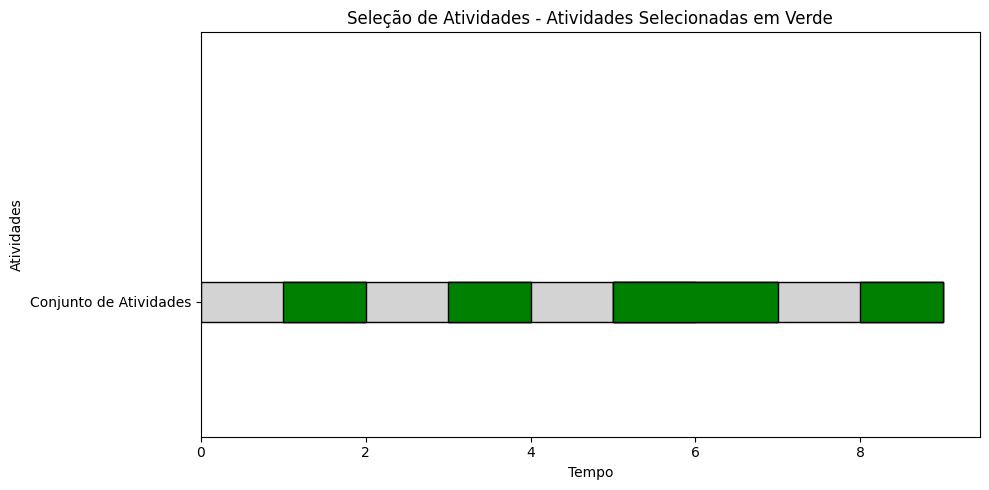

In [2]:
import matplotlib.pyplot as plt

def selecao_atividades_recursiva(inicios, finais, ultimo_fim=-1, indice=0):
    # Caso base: não há mais atividades para processar
    if indice >= len(inicios):
        return []
    # Verifica se a atividade atual é compatível
    if inicios[indice] >= ultimo_fim:
        # Inclui a atividade atual
        incluir = [(inicios[indice], finais[indice])] + \
                  selecao_atividades_recursiva(inicios, finais, finais[indice], indice + 1)
        return incluir
    else:
        # Pula a atividade atual
        incluir = selecao_atividades_recursiva(inicios, finais, ultimo_fim, indice + 1)
        return incluir

def selecao_atividades(inicios, finais):
    # Combina as listas de inícios e términos em uma lista de tuplas (inicio, fim)
    atividades = list(zip(inicios, finais))
    # Ordena as atividades pelo tempo de término em ordem crescente
    atividades.sort(key=lambda x: x[1])
    
    # Cria uma lista vazia para armazenar as atividades selecionadas
    selecionadas = []
    # Variável para rastrear o tempo de término da última atividade selecionada
    ultimo_fim = -1
    # Itera sobre cada atividade ordenada
    for inicio, fim in atividades:
        # Verifica se a atividade atual começa após ou exatamente quando a última atividade selecionada termina
        if inicio >= ultimo_fim:
            # Adiciona a atividade atual à lista de atividades selecionadas
            selecionadas.append((inicio, fim))
            # Atualiza o tempo de término da última atividade selecionada
            ultimo_fim = fim
    # Retorna a lista de atividades selecionadas
    return selecionadas

# Exemplo de uso
inicios = [1, 3, 0, 5, 8, 5]
finais = [2, 4, 6, 7, 9, 9]
selecionadas = selecao_atividades(inicios, finais)

# Pré-processa ordenando por tempo de término
atividades = sorted(zip(inicios, finais), key=lambda x: x[1])
inicios, finais = zip(*atividades)

resultado = selecao_atividades_recursiva(inicios, finais)
print("Atividades selecionadas (recursivo):", resultado)
# RESPOSTA ESPERADA
# Atividades selecionadas (recursivo): [(1, 2), (3, 4), (5, 7), (8, 9)]

# Plot dos resultados
plt.figure(figsize=(10,5))
nivel_y = 1  # Para posicionar as barras das atividades
altura = 0.3

# Plotar todas as atividades em uma cor neutra
for ini, fim in zip(inicios, finais):
    plt.barh(nivel_y, fim - ini, left=ini, height=altura, color='lightgray', edgecolor='black')
    
# Destacar as atividades selecionadas em outra cor
for ini, fim in selecionadas:
    plt.barh(nivel_y, fim - ini, left=ini, height=altura, color='green', edgecolor='black')

plt.xlabel('Tempo')
plt.ylabel('Atividades')
plt.title('Seleção de Atividades - Atividades Selecionadas em Verde')

# Ajusta o eixo Y para caber a barra
plt.yticks([nivel_y], ["Conjunto de Atividades"])
plt.ylim(nivel_y - 1, nivel_y + 2)
plt.tight_layout()
plt.show()